Example using PyXspec with NuSTAR solar data - simulatenous fit to AB with an isothermal model, then outputting various plots and the results.

Needs PyXspec to be [installed via HEASOFT and setup to work with jupyter](https://heasarc.gsfc.nasa.gov/xanadu/xspec/python/html/buildinstall.html).

Using proper solar coronal abundances which are [provided via this text] file(https://github.com/ianan/nustar_sac/blob/master/xspec/feld92a_coronal0.txt).

Based off the examples from HEASARC [https://github.com/HEASARC/PyXspec-Jupyter-notebooks](https://github.com/HEASARC/PyXspec-Jupyter-notebooks).

* 10-Dec-2021    IGH.

In [1]:
%load_ext wurlitzer
import IPython.display

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter('ignore')

import pickle

# Some useful parameters
# norm = 1e-14/(4piD_A^2)*\int n_e n_p dV
# The norm factor from the XSPEC APEC model is defined here: https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node134.html
kev2mk=0.0861733
emfact=3.5557e-42

# Need to have done source $HEADAS/headas-init.csh before starting jupyter for this to work
from xspec import *

In [2]:
# Where to put the figures
fdir='/Users/iain/Desktop/ns_example/'
# Where are the pha, rmf, arf files?
ddir='/Users/iain/Desktop/ns_example/event_cl/'
xdir='xspec_dir'
# Need to provide the ontime yourself (but should know it if have original .evt or usr_gti files)
dur=100

In [3]:
# Change directory to where the data is, first save current dir (might need it later?)
cwd=os.getcwd()
os.chdir(ddir+xdir)

In [4]:
# This is where all your pha, arf, rmf and abundance files are, i.e. where xspec will run
print(os.getcwd())

/Users/iain/Desktop/ns_example/event_cl/xspec_dir


In [5]:
# In this case loading in A and B to fit togerther
# Need to provide your own data
sall=AllData("1:1 nu20511319001A06_sr.pha 2:2 nu20511319001B06_sr.pha")

# If fitting a single spectrum then can do
# s = AllData("nu20511318001A06_sr.pha")


2 spectra  in use
 
Spectral Data File: nu20511319001A06_sr.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.513e+02 +/- 1.609e+00
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4096
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 58.44 sec
 Using fit statistic: chi
 Using Response (RMF) File            nu20511319001A06_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  nu20511319001A06_sr.arf

Spectral Data File: nu20511319001B06_sr.pha  Spectrum 2
Net count rate (cts/s) for Spectrum:2  2.022e+02 +/- 2.002e+00
 Assigned to Data Group 2 and Plot Group 2
  Noticed Channels:  1-4096
  Telescope: NuSTAR Instrument: FPMB  Channel Type: PI
  Exposure Time: 50.44 sec
 Using fit statistic: chi
 Using Response (RMF) File            nu20511319001B06_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  nu20511319001B06_sr.arf



In [6]:
# Get some useful info like exposure
expa=AllData(1).exposure
expb=AllData(2).exposure
expab=0.5*(expa+expb)
print(expa,expb)

58.438140869140625 50.44291687011719


In [7]:
# Energy range to fit over
fiter=[2.5,5.0]
# Some helpful string labels for the energy fit range
fiter1=("{0:4.2f}".format(fiter[0])).lstrip()
fiter2=("{0:4.2f}".format(fiter[1])).lstrip()
fiterlab="{0:3d}{1:3d}".format(int(10*fiter[0]),int(10*fiter[1]))
fiterlab=fiterlab.replace(" ","")

In [8]:
# This is a single apec thermal model, with a scaling constant for B relative to A
Model("const*apec")
m1=AllModels(1)
m2=AllModels(2)
# Need to thaw and untie m2 constant
m2.constant.factor.values="1.0,-0.1"
m2.constant.factor.untie()
m2.constant.factor.frozen=False
m1.constant.factor.frozen=True
# Alternatively can do this via the par index instead of name
# m2(1).values="1.0,-0.1"
# m1(1).frozen=True
# m2(1).untie()
# m2(1).frozen=False


Model constant<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
                           Data group: 1
   1    1   constant   factor              1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
                           Data group: 2
   6    1   constant   factor              1.00000      = p1
   7    2   apec       kT         keV      1.00000      = p2
   8    2   apec       Abundanc            1.00000      = p3
   9    2   apec       Redshift            0.0          = p4
  10    2   apec       norm                1.00000      = p5
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared                

In [9]:
# Just check the model is setup as expected
m1.show()
m2.show()


Model constant<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
                           Data group: 1
   1    1   constant   factor              1.00000      frozen
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Model constant<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
                           Data group: 2
   6    1   constant   factor              1.00000      +/-  0.0          
   7    2   apec       kT         keV      1.00000      = p2
   8    2   apec       Abundanc            1.00000      = p3
   9    2   apec       Redshift            0.0          = p4
  10    2   apec     

In [10]:
#  Some fit and model setup
Fit.statMethod="cstat"
# Changing to proper solar coronal abundances so need feld92a_coronal0.txt file in dir doing XSPEC fit
Xset.abund="file feld92a_coronal0.txt"
Fit.nIterations=1000

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                91134.51     using 4096 bins.
                 C-Statistic                101022.3     using 4096 bins.
Total fit statistic                         192156.8     with 8189 d.o.f.

Test statistic : Chi-Squared                18859.41     using 8192 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 0.00e+00 with 8189 degrees of freedom
 Current data and model not fit yet.
 Solar Abundance Vector set to file:  User defined abundance vector / no description specified

Fit statistic  : C-Statistic                80580.22     using 4096 bins.
                 C-Statistic                88534.13     using 4096 bins.
Total fit statistic                         169114.4     with 8189 d.o.f.

Test statistic : Chi-Squared                18748.99     u

In [11]:
# Set fit energy range and do the fit 
AllData.ignore("bad")
AllData.ignore("*:0.-"+fiter1+" "+fiter2+"-**")
Fit.renorm()
Fit.perform()


Fit statistic  : C-Statistic                80580.22     using 4096 bins.
                 C-Statistic                88534.13     using 4096 bins.
Total fit statistic                         169114.4     with 8189 d.o.f.

Test statistic : Chi-Squared                18748.99     using 8192 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 0.00e+00 with 8189 degrees of freedom
 Current data and model not fit yet.

    23 channels (1-23) ignored in spectrum #     1
    23 channels (1-23) ignored in spectrum #     2
  4012 channels (85-4096) ignored in spectrum #     1
  4012 channels (85-4096) ignored in spectrum #     2

Fit statistic  : C-Statistic                16387.87     using 61 bins.
                 C-Statistic                16678.76     using 61 bins.
Total fit statistic                         33066.63     with 119 d.o.f.

Test statistic : Chi-Squared                 4771.36

In [12]:
# Determine the 1sigma confidence levels for our 3 parameters
Fit.error("1.0 2 5 6")

 Parameter   Confidence Range (1)
     2     0.328849     0.337764    (-0.00401496,0.00489993)
     5      5485.64      6630.82    (-573.566,571.613)
     6      1.04397      1.10496    (-0.0300626,0.0309287)


In [13]:
# So what are the fit results?
tmk=m1.apec.kT.values[0]/kev2mk
tmk_ci=[m1.apec.kT.error[0]/kev2mk,m1.apec.kT.error[1]/kev2mk]
em=m1.apec.norm.values[0]/emfact
em_ci=[m1.apec.norm.error[0]/emfact,m1.apec.norm.error[1]/emfact]
fac=m2.constant.factor.values[0]
fac_ci=m2.constant.factor.error[0:2]

print("T: {0:4.2f} ({1:4.2f},{2:4.2f}) [MK]".format(tmk,tmk_ci[0],tmk_ci[1]))
print("EM: {0:.2e} ({1:.2e},{2:.2e}) [cm^-3]".format(em,em_ci[0],em_ci[1]))
print("C: {0:4.2f} ({1:4.2f},{2:4.2f})".format(fac,fac_ci[0],fac_ci[1]))

T: 3.86 (3.82,3.92) [MK]
EM: 1.70e+45 (1.54e+45,1.86e+45) [cm^-3]
C: 1.07 (1.04,1.10)


In [14]:
# And now to plot
# First get A, B separately
AllData.notice("*: 1.6-10.0")

Plot.device = "/null"
Plot.xAxis="keV"
Plot.setGroup(None)
Plot("data delchi")

dataLabels = Plot.labels(1)
residLabels = Plot.labels(2)
# energy binning of A and B might be different due to where data and rebinning, so get separately
engsA = Plot.x(1)
edelsA = Plot.xErr(1)
ratA = Plot.y(1,1)
errA = Plot.yErr(1,1)
engsB = Plot.x(2)
edelsB = Plot.xErr(2)
ratB = Plot.y(2,1)
errB = Plot.yErr(2,1)
fmdA = Plot.model()
fmdB = Plot.model(2)
stepeA = list()
for i in range(len(engsA)):
    stepeA.append(engsA[i] - edelsA[i])
stepeA.append(engsA[-1]+edelsA[-1])
stepeB = list()
for i in range(len(engsB)):
    stepeB.append(engsB[i] - edelsB[i])
stepeB.append(engsB[-1]+edelsB[-1])

fmdA.append(fmdA[-1])
fmdB.append(fmdB[-1])

# Now get AB combined 
Plot.setGroup("1-2")
Plot("data delchi")

engsAB = Plot.x()
edelsAB = Plot.xErr()
ratAB = Plot.y()
errAB = Plot.yErr()
fmdAB= Plot.model()
nE = len(engsAB)
stepAB = list()
for i in range(nE):
    stepAB.append(engsAB[i] - edelsAB[i])
stepAB.append(engsAB[-1]+edelsAB[-1])
fmdAB.append(fmdAB[-1])
resAB = Plot.y(1,2)

# Just manually work out resid as data-model/error

newresA=[]
for i in range(len(ratA)):
    newresA.append((np.array(ratA[i])-np.array(fmdA[i]))/np.array(errA[i]))
    
newresB=[]
for i in range(len(ratB)):
    newresB.append((np.array(ratB[i])-np.array(fmdB[i]))/np.array(errB[i]))

newresAB=[]
for i in range(len(ratAB)):
    newresAB.append((np.array(ratAB[i])-np.array(fmdAB[i]))/np.array(errAB[i]))


   210 channels (1-210) noticed in spectrum #     1
   210 channels (1-210) noticed in spectrum #     2

Fit statistic  : C-Statistic                 3087.72     using 210 bins.
                 C-Statistic                 1880.89     using 210 bins.
Total fit statistic                          4968.61     with 417 d.o.f.

Test statistic : Chi-Squared                 3678.95     using 420 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 0.00e+00 with 417 degrees of freedom
 Current data and model not fit yet.

***Warning: Fit is not current.
***Warning: Fit is not current.


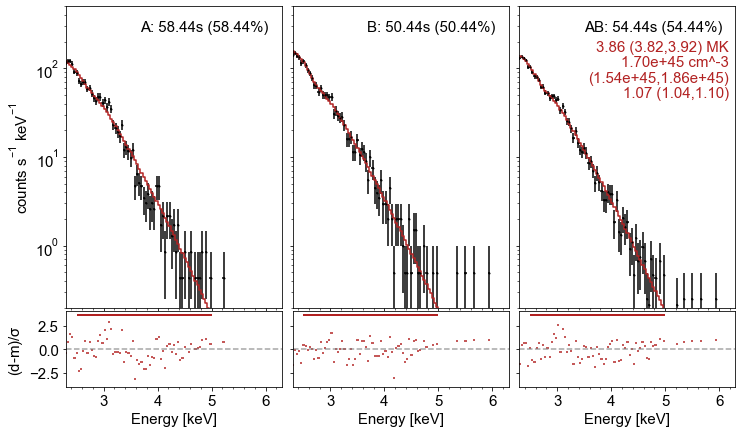

In [15]:
## Now plot them all together!
## This is the simulatenous fit results to A and B, being shown as A, B then AB data+folded model
widths = [3, 3, 3]
heights = [4,1]

xlim=[2.3,6.3]
nmax=round(xlim[1]-xlim[0])

ylim=[2e-1,5e2]
yrlim=[-4,4]
plt.rcParams.update({'font.size': 15,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

gs_kw = dict(width_ratios=widths, height_ratios=heights,hspace=0.02,wspace=0.05)
fig, axs = plt.subplots(ncols=3, nrows=2, constrained_layout=False,
                             gridspec_kw=gs_kw,figsize=(12,7))

labA="A: {0:4.2f}s ({1:4.2f}%)".format(expa,100*expa/dur)
labB="B: {0:4.2f}s ({1:4.2f}%)".format(expb,100*expb/dur)
labAB="AB: {0:4.2f}s ({1:4.2f}%)".format(expab,100*expab/dur)
axs[0,0].errorbar(engsA,ratA,xerr=edelsA,yerr=errA,fmt='.',color='k',label=labA,lw=1.5,ms=2)
axs[0,0].step(stepeA,fmdA,where='post',color='firebrick')
axs[0,1].errorbar(engsB,ratB,xerr=edelsB,yerr=errB,fmt='.',color='k',label=labB,lw=1.5,ms=2)
axs[0,1].step(stepeB,fmdB,where='post',color='firebrick')
axs[0,2].errorbar(engsAB,ratAB,xerr=edelsAB,yerr=errAB,fmt='.',color='k',label=labAB,lw=1.5,ms=2)
axs[0,2].step(stepAB,fmdAB,where='post',color='firebrick')

axs[0,2].text(0.97,0.85,"{0:4.2f} ({1:4.2f},{2:4.2f}) MK".format(tmk,tmk_ci[0],tmk_ci[1]),\
              color='firebrick',ha='right',transform=axs[0,2].transAxes)
axs[0,2].text(0.97,0.8,"{0:.2e} cm^-3".format(em),\
              color='firebrick',ha='right',transform=axs[0,2].transAxes)
axs[0,2].text(0.97,0.75,"({0:.2e},{1:.2e})".format(em_ci[0],em_ci[1]),\
              color='firebrick',ha='right',transform=axs[0,2].transAxes)
axs[0,2].text(0.97,0.7,"{0:4.2f} ({1:4.2f},{2:4.2f})".format(fac,fac_ci[0],fac_ci[1]),\
              color='firebrick',ha='right',transform=axs[0,2].transAxes)
axs[1,0].hlines(newresA,stepeA[0:-1],stepeA[1:],color='firebrick')
axs[1,1].hlines(newresB,stepeB[0:-1],stepeB[1:],color='firebrick')
axs[1,2].hlines(newresAB,stepAB[0:-1],stepAB[1:],color='firebrick')

axs[0,0].set_ylabel(dataLabels[1])

for aa in axs[0,:]:
    aa.set_yscale("Log")
    aa.set_ylim(ylim)
    aa.set_xlim(xlim)
    aa.set_xlabel(" ")
    aa.set_xticklabels([])
    aa.xaxis.set_major_locator(plt.MaxNLocator(nmax))
    aa.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
    handles, labels = aa.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    aa.legend(handles, labels,markerscale=0,handlelength=-0.5,edgecolor='w',framealpha=0)

# axs[1,0].set_ylabel(residLabels[1])   
axs[1,0].set_ylabel("(d-m)/$\sigma$")

for aa in axs[1,:]:
    aa.set_ylim(yrlim)
    aa.set_xlim(xlim)
    aa.set_xlabel("Energy [keV]")
    aa.xaxis.set_major_locator(plt.MaxNLocator(nmax))
    aa.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
    aa.hlines(0.0,xlim[0],xlim[1],color='grey',linestyle="--",alpha=0.7)
    aa.hlines(yrlim[1]*0.9,fiter[0],fiter[1],color='firebrick',lw=2)
    
for aa in axs[:,1]:
    aa.set_yticklabels([])
for aa in axs[:,2]:
    aa.set_yticklabels([])

# plt.savefig(fdir+'AB3_th_norb_'+fiterlab+'.pdf',bbox_inches='tight')
plt.show()

In [16]:
# Plot them all but this time using some rebinning
# -----
# First get A, B separately no energy rebinning
AllData.notice("*: 1.6-10.0")

Plot.device = "/null"
Plot.xAxis="keV"
# Next still makes sure still getting A,B separately
Plot.setGroup(None)
# Next line does the energy rebinning for plotting
Plot.setRebin(25,3)
Plot("data delchi")

dataLabels = Plot.labels(1)
residLabels = Plot.labels(2)
engsA = Plot.x(1)
edelsA = Plot.xErr(1)
ratA = Plot.y(1,1)
errA = Plot.yErr(1,1)
engsB = Plot.x(2)
edelsB = Plot.xErr(2)
ratB = Plot.y(2,1)
errB = Plot.yErr(2,1)
fmdA = Plot.model()
fmdB = Plot.model(2)
stepeA = list()
for i in range(len(engsA)):
    stepeA.append(engsA[i] - edelsA[i])
stepeA.append(engsA[-1]+edelsA[-1])
stepeB = list()
for i in range(len(engsB)):
    stepeB.append(engsB[i] - edelsB[i])
stepeB.append(engsB[-1]+edelsB[-1])

fmdA.append(fmdA[-1])
fmdB.append(fmdB[-1])

resA = Plot.y(1,2)
resB = Plot.y(2,2)

# -----
# Now get AB combined with energy rebinning
Plot.setGroup("1-2")
Plot("data delchi")

engsAB = Plot.x()
edelsAB = Plot.xErr()
ratAB = Plot.y()
errAB = Plot.yErr()
fmdAB= Plot.model()
stepAB = list()
for i in range(len(engsAB)):
    stepAB.append(engsAB[i] - edelsAB[i])
stepAB.append(engsAB[-1]+edelsAB[-1])
fmdAB.append(fmdAB[-1])
resAB = Plot.y(1,2)

# Just manually work out resid as data-model/error
newresA=[]
for i in range(len(ratA)):
    newresA.append((np.array(ratA[i])-np.array(fmdA[i]))/np.array(errA[i]))
    
newresB=[]
for i in range(len(ratB)):
    newresB.append((np.array(ratB[i])-np.array(fmdB[i]))/np.array(errB[i]))

newresAB=[]
for i in range(len(ratAB)):
    newresAB.append((np.array(ratAB[i])-np.array(fmdAB[i]))/np.array(errAB[i]))    

   210 channels (1-210) noticed in spectrum #     1
   210 channels (1-210) noticed in spectrum #     2

Fit statistic  : C-Statistic                 3087.72     using 210 bins.
                 C-Statistic                 1880.89     using 210 bins.
Total fit statistic                          4968.61     with 417 d.o.f.

Test statistic : Chi-Squared                 3678.95     using 420 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 0.00e+00 with 417 degrees of freedom
 Current data and model not fit yet.

***Warning: Fit is not current.
***Warning: Fit is not current.


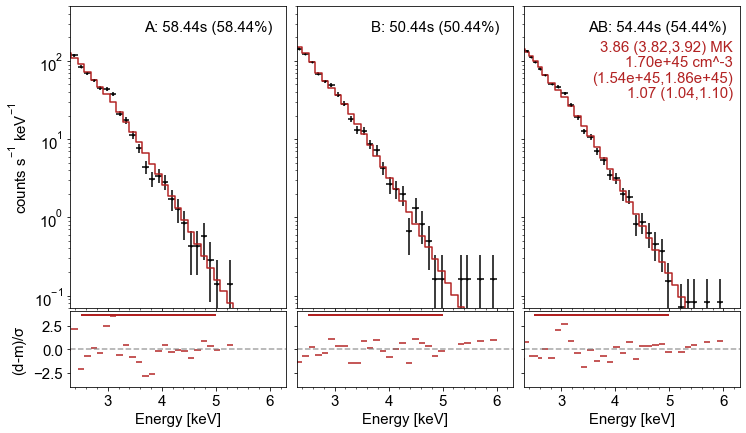

In [17]:
## Now plot the rebinned ones all together!
## This is the simulatenous fit to original binning, being shown as A, B then AB data+folded model rebinned (for plot)

widths = [3, 3, 3]
heights = [4,1]

xlim=[2.3,6.3]
nmax=round(xlim[1]-xlim[0])

ylim=[7e-2,5e2]
yrlim=[-4,4]
plt.rcParams.update({'font.size': 15,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

gs_kw = dict(width_ratios=widths, height_ratios=heights,hspace=0.02,wspace=0.05)
fig, axs = plt.subplots(ncols=3, nrows=2, constrained_layout=False,
                             gridspec_kw=gs_kw,figsize=(12,7))

labA="A: {0:4.2f}s ({1:4.2f}%)".format(expa,100*expa/dur)
labB="B: {0:4.2f}s ({1:4.2f}%)".format(expb,100*expb/dur)
labAB="AB: {0:4.2f}s ({1:4.2f}%)".format(expab,100*expab/dur)
axs[0,0].errorbar(engsA,ratA,xerr=edelsA,yerr=errA,fmt='.',color='k',label=labA,lw=1.5,ms=2)
axs[0,0].step(stepeA,fmdA,where='post',color='firebrick')
axs[0,1].errorbar(engsB,ratB,xerr=edelsB,yerr=errB,fmt='.',color='k',label=labB,lw=1.5,ms=2)
axs[0,1].step(stepeB,fmdB,where='post',color='firebrick')
axs[0,2].errorbar(engsAB,ratAB,xerr=edelsAB,yerr=errAB,fmt='.',color='k',label=labAB,lw=1.5,ms=2)
axs[0,2].step(stepAB,fmdAB,where='post',color='firebrick')

axs[0,2].text(0.97,0.85,"{0:4.2f} ({1:4.2f},{2:4.2f}) MK".format(tmk,tmk_ci[0],tmk_ci[1]),\
              color='firebrick',ha='right',transform=axs[0,2].transAxes)
axs[0,2].text(0.97,0.8,"{0:.2e} cm^-3".format(em),\
              color='firebrick',ha='right',transform=axs[0,2].transAxes)
axs[0,2].text(0.97,0.75,"({0:.2e},{1:.2e})".format(em_ci[0],em_ci[1]),\
              color='firebrick',ha='right',transform=axs[0,2].transAxes)
axs[0,2].text(0.97,0.7,"{0:4.2f} ({1:4.2f},{2:4.2f})".format(fac,fac_ci[0],fac_ci[1]),\
              color='firebrick',ha='right',transform=axs[0,2].transAxes)
axs[1,0].hlines(newresA,stepeA[0:-1],stepeA[1:],color='firebrick',lw=1.5)
axs[1,1].hlines(newresB,stepeB[0:-1],stepeB[1:],color='firebrick',lw=1.5)
axs[1,2].hlines(newresAB,stepAB[0:-1],stepAB[1:],color='firebrick',lw=1.5)

axs[0,0].set_ylabel(dataLabels[1])

for aa in axs[0,:]:
    aa.set_yscale("Log")
    aa.set_ylim(ylim)
    aa.set_xlim(xlim)
    aa.set_xlabel(" ")
    aa.set_xticklabels([])
    aa.xaxis.set_major_locator(plt.MaxNLocator(nmax))
    aa.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
    handles, labels = aa.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    aa.legend(handles, labels,markerscale=0,handlelength=-0.5,edgecolor='w',framealpha=0)

# axs[1,0].set_ylabel(residLabels[1])   
axs[1,0].set_ylabel("(d-m)/$\sigma$")

for aa in axs[1,:]:
    aa.set_ylim(yrlim)
    aa.set_xlim(xlim)
    aa.set_xlabel("Energy [keV]")
    aa.xaxis.set_major_locator(plt.MaxNLocator(nmax))
    aa.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
    aa.hlines(0.0,xlim[0],xlim[1],color='grey',linestyle="--",alpha=0.7)
    aa.hlines(yrlim[1]*0.9,fiter[0],fiter[1],color='firebrick',lw=2)
    
for aa in axs[:,1]:
    aa.set_yticklabels([])
for aa in axs[:,2]:
    aa.set_yticklabels([])

# plt.savefig(fdir+'AB3_th_prb_'+fiterlab+'.pdf',bbox_inches='tight')
plt.show()


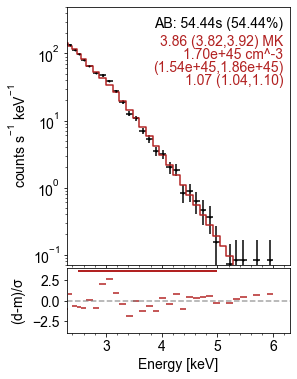

In [18]:
# Just do a single plot of the combined and rebinned
widths = [3, 3, 3]
heights = [4,1]

xlim=[2.3,6.3]
nmax=round(xlim[1]-xlim[0])

ylim=[7e-2,5e2]
yrlim=[-4,4]
plt.rcParams.update({'font.size': 14,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

gs_kw = dict( height_ratios=heights,hspace=0.02,wspace=0.05)
fig, axs = plt.subplots(ncols=1, nrows=2, constrained_layout=False,
                             gridspec_kw=gs_kw,figsize=(4,6))

labAB="AB: {0:4.2f}s ({1:4.2f}%)".format(expab,100*expab/dur)
axs[0].errorbar(engsAB,ratAB,xerr=edelsAB,yerr=errAB,fmt='.',color='k',lw=1.5,ms=2)
axs[0].step(stepAB,fmdAB,where='post',color='firebrick')
axs[0].text(0.97,0.92,labAB,color='k',ha='right',transform=axs[0].transAxes)
axs[0].text(0.97,0.85,"{0:4.2f} ({1:4.2f},{2:4.2f}) MK".format(tmk,tmk_ci[0],tmk_ci[1]),\
              color='firebrick',ha='right',transform=axs[0].transAxes)
axs[0].text(0.97,0.8,"{0:.2e} cm^-3".format(em),\
              color='firebrick',ha='right',transform=axs[0].transAxes)
axs[0].text(0.97,0.75,"({0:.2e},{1:.2e})".format(em_ci[0],em_ci[1]),\
              color='firebrick',ha='right',transform=axs[0].transAxes)
axs[0].text(0.97,0.7,"{0:4.2f} ({1:4.2f},{2:4.2f})".format(fac,fac_ci[0],fac_ci[1]),\
              color='firebrick',ha='right',transform=axs[0].transAxes)
axs[1].hlines(newresAB,stepAB[0:-1],stepAB[1:],color='firebrick',lw=1.5)

axs[0].set_ylabel(dataLabels[1])

axs[0].set_yscale("Log")
axs[0].set_ylim(ylim)
axs[0].set_xlim(xlim)
axs[0].set_xlabel(" ")
axs[0].set_xticklabels([])
axs[0].xaxis.set_major_locator(plt.MaxNLocator(nmax))
axs[0].xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))

  
axs[1].set_ylabel("(d-m)/$\sigma$")
axs[1].set_ylim(yrlim)
axs[1].set_xlim(xlim)
axs[1].set_xlabel("Energy [keV]")
axs[1].xaxis.set_major_locator(plt.MaxNLocator(nmax))
axs[1].xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(5))
axs[1].hlines(0.0,xlim[0],xlim[1],color='grey',linestyle="--",alpha=0.7)
axs[1].hlines(yrlim[1]*0.9,fiter[0],fiter[1],color='firebrick',lw=2)
    
# plt.savefig(fdir+'AB_th_prb_'+fiterlab+'.pdf',bbox_inches='tight')
plt.show()


In [19]:
# Save out the final AB prb plot data and results
res={"exp":expab,"lvtp":100*expab/dur,
     "cstat":Fit.statistic,"chisq":Fit.testStatistic,"fiter":fiter,
     "rat_lab":dataLabels[1],"dchi_units":"(d-m)/$\sigma$",
     "tmk":tmk,"tmk_ci":tmk_ci,"em":em,"em_ci":em_ci,"fac":fac,"fac_ci":fac_ci,
     "rat_eng":engsAB,"rat":ratAB,"rat_eng_err":edelsAB,"rat_err":errAB,
     "dchi":newresAB,"eng_step":stepAB,"fmd":fmdAB}

pickle.dump(res, open( cwd+"/res_"+xdir+'_th_prb_'+fiterlab+".p", "wb" ) )


In [20]:
# Can the reload again (great for comparing different fits etc) via
rso=pickle.load( open( cwd+"/res_"+xdir+'_th_prb_'+fiterlab+".p", "rb" ) )

print(rso["tmk"],rso["em"])

3.862724804388423 1.7040829619412275e+45
